## Model Training

**Import Data and Required Packages**

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split

**Importing Dataset**

In [9]:
data = pd.read_csv('data/stud.csv')

In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y variables**

In [12]:
X = data.drop(['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
y = data['math_score']

In [14]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
        ("StandardScaler", StandardScaler(), num_features)
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape

((800, 19), (200, 19))

**Create an Evaluate Function to give all metrics after model Training**

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(verbose=False)
}

models_r2score = pd.DataFrame()

for model_name in models:
    model = models[model_name]

    # Train Model
    model.fit(x_train, y_train)

    # Make Predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Evaluate Model
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_pred_train)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_pred_test)

    # Model Performance
    print(f'{model_name} :\n')
    print(f"MAE ---> Train = {train_mae} :: Test = {test_mae}")
    print(f"MSE ---> Train = {train_rmse} :: Test = {test_rmse}")
    print(f"R2 Score ----> Train = {train_r2} :: Test = {test_r2}")
    print('-'*70)

    new_row = pd.DataFrame({"MODEL NAME": model_name, "R2_SCORE": test_r2}, index=[0])
    models_r2score = pd.concat([models_r2score, new_row], ignore_index=True)
    

Linear Regression :

MAE ---> Train = 4.3200015259094195 :: Test = 3.989814611743907
MSE ---> Train = 5.399828151877263 :: Test = 5.064845270842709
R2 Score ----> Train = 0.8706220241207835 :: Test = 0.8954807540309732
----------------------------------------------------------------------
Ridge :

MAE ---> Train = 4.319456213282094 :: Test = 3.9876107745563423
MSE ---> Train = 5.400053865274241 :: Test = 5.065655979684108
R2 Score ----> Train = 0.8706112078681403 :: Test = 0.895447291425963
----------------------------------------------------------------------
Lasso :

MAE ---> Train = 5.241810134590585 :: Test = 5.093528853464244
MSE ---> Train = 6.624450512210872 :: Test = 6.464978579476422
R2 Score ----> Train = 0.8052846476062459 :: Test = 0.8297064952059505
----------------------------------------------------------------------
K-Neighbors Regressor :

MAE ---> Train = 4.6985 :: Test = 5.513
MSE ---> Train = 5.909585433852361 :: Test = 6.902622689963576
R2 Score ----> Train = 0.845

In [31]:
models_r2score.sort_values(by=["R2_SCORE"],ascending=False)

,MODEL NAME,R2_SCORE
0,Linear Regression,0.895481
1,Ridge,0.895447
8,CatBoost Regressor,0.876273
5,Random Forest Regressor,0.857448
6,AdaBoost Regressor,0.846764
7,XGB Regressor,0.836210
2,Lasso,0.829706
3,K-Neighbors Regressor,0.805870
4,Decision Tree,0.738912


- Thus the final model is Linear Regression with an accuracy of 0.89

**Plot y_pred and y_test**

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.55


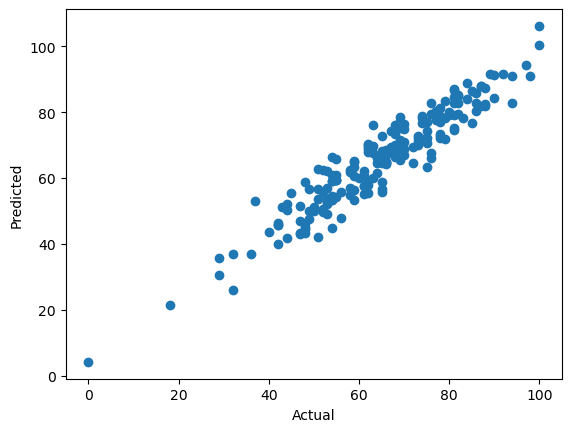

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

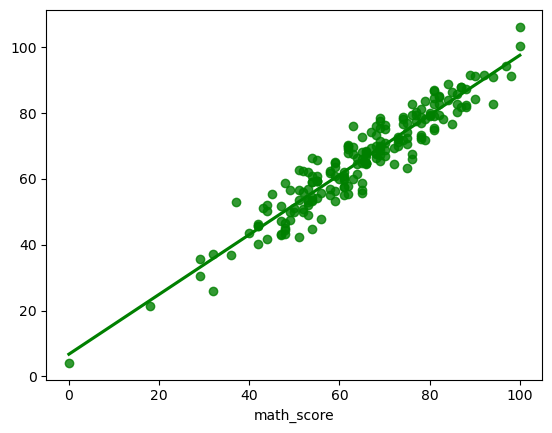

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');